## Camera Images Concentrate
Alf said that, e.g. `1000x1000` images, when viewed as vectors in $\mathbb{R}^{10^6}\,$, do not disperse across a large region of the space; instead, they seem to "_concentrate in a small corner_".

Let's verify the validity of this statement.

I propose two datasets that we can use to the end

- Kaggle's `dogs-vs-cats` dataset
  - Download the Kaggle `dogs-vs-cats` dataset from [here (kaggle's website)](https://www.kaggle.com/c/dogs-vs-cats/data)
- ImageNet
  - PyTorch provides no downloading of ImageNet. It only provides some kind of an ImageNet data loader: <https://stackoverflow.com/questions/60607824/pytorch-imagenet-dataset>
  - TensorFlow does provide (downloading) ImageNet. I choose to use this one: <https://www.tensorflow.org/datasets/catalog/imagenet_resized>



In [9]:
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

In [93]:
import torchvision.datasets

In [3]:
from pathlib import Path
path_dataset = Path.home() / "datasets/kaggle/dogs-vs-cats/train"
path_dataset.exists()

True

In [3]:
list(path_dataset.iterdir())[:5]

[PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/cat.10309.jpg'),
 PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/cat.7641.jpg'),
 PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.1658.jpg'),
 PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.10645.jpg'),
 PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.2679.jpg')]

In [4]:
import random
#random.seed(2)    # neither dog nor cat
#random.seed(127)  # a funny dog
random.seed(27)    # a sad dog
path_random_image = random.choice(list(path_dataset.iterdir()))
path_random_image

PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.2426.jpg')

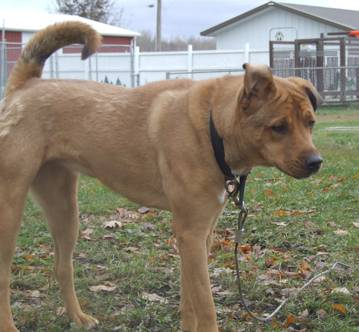

In [5]:
from IPython import display
display.Image(filename=path_random_image, width=200)

In [6]:
import cv2
image_random = cv2.imread(str(path_random_image))
image_random.shape, image_random.dtype

((332, 359, 3), dtype('uint8'))

### `shape` all the same?
Nope.

In [7]:
from PIL import Image
n_shown = 10
for i, p in enumerate(path_dataset.iterdir()):
    if i >= n_shown:
        break
    w, h = Image.open(p).size
    print(f"w, h = ({w}, {h})")

w, h = (500, 271)
w, h = (499, 334)
w, h = (292, 390)
w, h = (316, 499)
w, h = (500, 439)
w, h = (499, 295)
w, h = (500, 451)
w, h = (264, 244)
w, h = (499, 375)
w, h = (357, 335)


Here's how I am going to measure the distance btw normal pictures and random RGB images:
> - Randomly choose one real image
> - Randomly choose another, say, `100` images
> - Randomly generate another `100` RGB images
> - Calculate the max, mean distances of the two groups of images to the first chosen image

In [168]:
L_101_paths = random.sample(list(path_dataset.iterdir()), k=101)

In [11]:
uniform_size = (500, 400)  # determined arbitrarily
image_fixed = cv2.resize(cv2.imread(str(L_101_paths[0])), uniform_size)
image_fixed.shape, image_fixed.dtype

NameError: name 'L_101_paths' is not defined

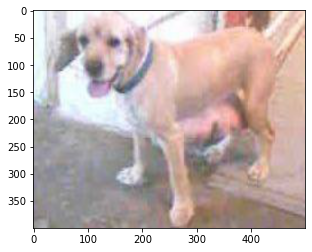

In [170]:
plt.imshow(image_fixed[..., ::-1]);

In [186]:
L_distances_type_1 = []
for p in L_101_paths[1:]:
    image = cv2.resize(cv2.imread(str(p)), uniform_size)
    L_distances_type_1.append(
        np.linalg.norm(image_fixed.reshape((-1,)) - image.reshape((-1,))))
max(L_distances_type_1), sum(L_distances_type_1) / len(L_distances_type_1)

(129229.57655273812, 107359.9032980807)

In [173]:
L_distances_type_2 = []
for _ in range(100):
    image = np.random.randint(0, 256, size=(*(uniform_size[::-1]), 3),
                              dtype=np.uint8)
    L_distances_type_2.append(
        np.linalg.norm(image_fixed.reshape((-1,)) - image.reshape((-1,))))
max(L_distances_type_2), sum(L_distances_type_2) / len(L_distances_type_2)

(114309.12980597831, 114143.00010430948)

Let's visualize our random RGB images!

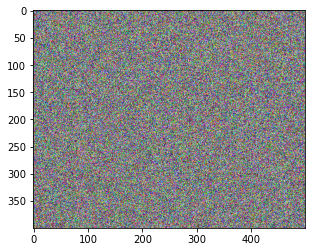

In [174]:
image = np.random.randint(0, 256, size=(*(uniform_size[::-1]), 3), dtype=np.uint8)
plt.imshow(image);

In [18]:
L_distances_type_2 = []
for _ in range(20):
    image = np.random.randint(0, 256, size=(*(uniform_size[::-1]), 3),
                              dtype=np.uint8)
    #plt.imshow(image);  # cannot show dynamically like this
    image_PIL = Image.fromarray(image)
    image_PIL.show()
    time.sleep(0.5)
    #image_PIL.close()  # useless because it's not closing window

**(?)** Why these random RGB images that we created above all look similar to human eyes? Why it's hard for a random image generated this way to have, say, a large green region?

In [19]:
uniform_size

(500, 400)

**(?)** Why not as expected? Because of `dtype`?

In [187]:
L_distances_type_1 = []
for p in L_101_paths[1:]:
    image = cv2.resize(cv2.imread(str(p)), uniform_size)
    L_distances_type_1.append(
        np.linalg.norm(image_fixed.reshape((-1,)).astype(np.float32) - 
                       image.reshape((-1,)).astype(np.float32)))
max(L_distances_type_1), sum(L_distances_type_1) / len(L_distances_type_1)

(107997.61, 76955.62796875)

In [184]:
L_distances_type_2 = []
for _ in range(100):
    image = np.random.randint(0, 256, size=(*(uniform_size[::-1]), 3), 
                              dtype=np.uint8)
    L_distances_type_2.append(
        np.linalg.norm(image_fixed.reshape((-1,)).astype(np.float32) -
                       image.reshape((-1,)).astype(np.float32)))
max(L_distances_type_2), sum(L_distances_type_2) / len(L_distances_type_2)

(75877.56, 75736.2775)

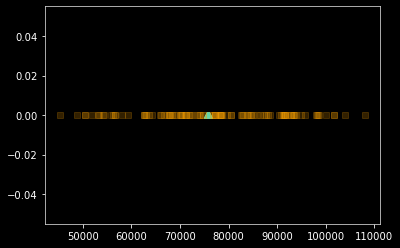

In [235]:
alpha = .2
plt.scatter(L_distances_type_2,
            [0]*len(L_distances_type_2),
            marker="^",
            color="turquoise",
            alpha=1);
plt.scatter(L_distances_type_1,
            [0]*len(L_distances_type_1),
            color="orange",
            marker="s",
            alpha=alpha);
plt.plot();

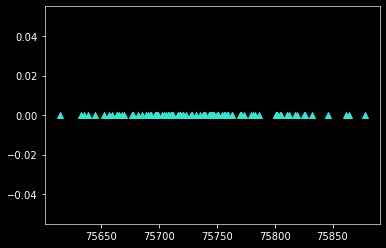

In [236]:
alpha = .2
plt.scatter(L_distances_type_2,
            [0]*len(L_distances_type_2),
            marker="^",
            color="turquoise",
            alpha=1);
plt.plot();

In [211]:
def argsort(seq):
    """
    args
        seq, list/tuple
        whose elements can be ordered, e.g. seq = [[3, 1242], [4, 757], [129, 757], [128, 1242]]
    return
        just like np.argsort but more general-purpose
    """
    return sorted(range(len(seq)), key=seq.__getitem__)

In [231]:
image_far = L_101_paths[argsort(L_distances_type_1)[-1] + 1]
image_far

PosixPath('/home/phunc20/datasets/kaggle/dogs-vs-cats/train/dog.3288.jpg')

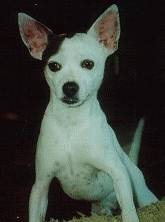

In [232]:
display.Image(image_far, width=300)

### Or Mabye...
We have picked a bad way to measure the distances. Let's try to devise a more careful way.